In [128]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [129]:
#Reading the file
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#Data Cleaning

In [130]:
df.shape

(2000, 8)

In [131]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [132]:
#Dropping the ID column
df = df.drop('ID', axis=1)

In [133]:
df.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [134]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [136]:
#Checking for null values
df.isnull().sum()  #There are no missing values.

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#Exploratory of Analysis

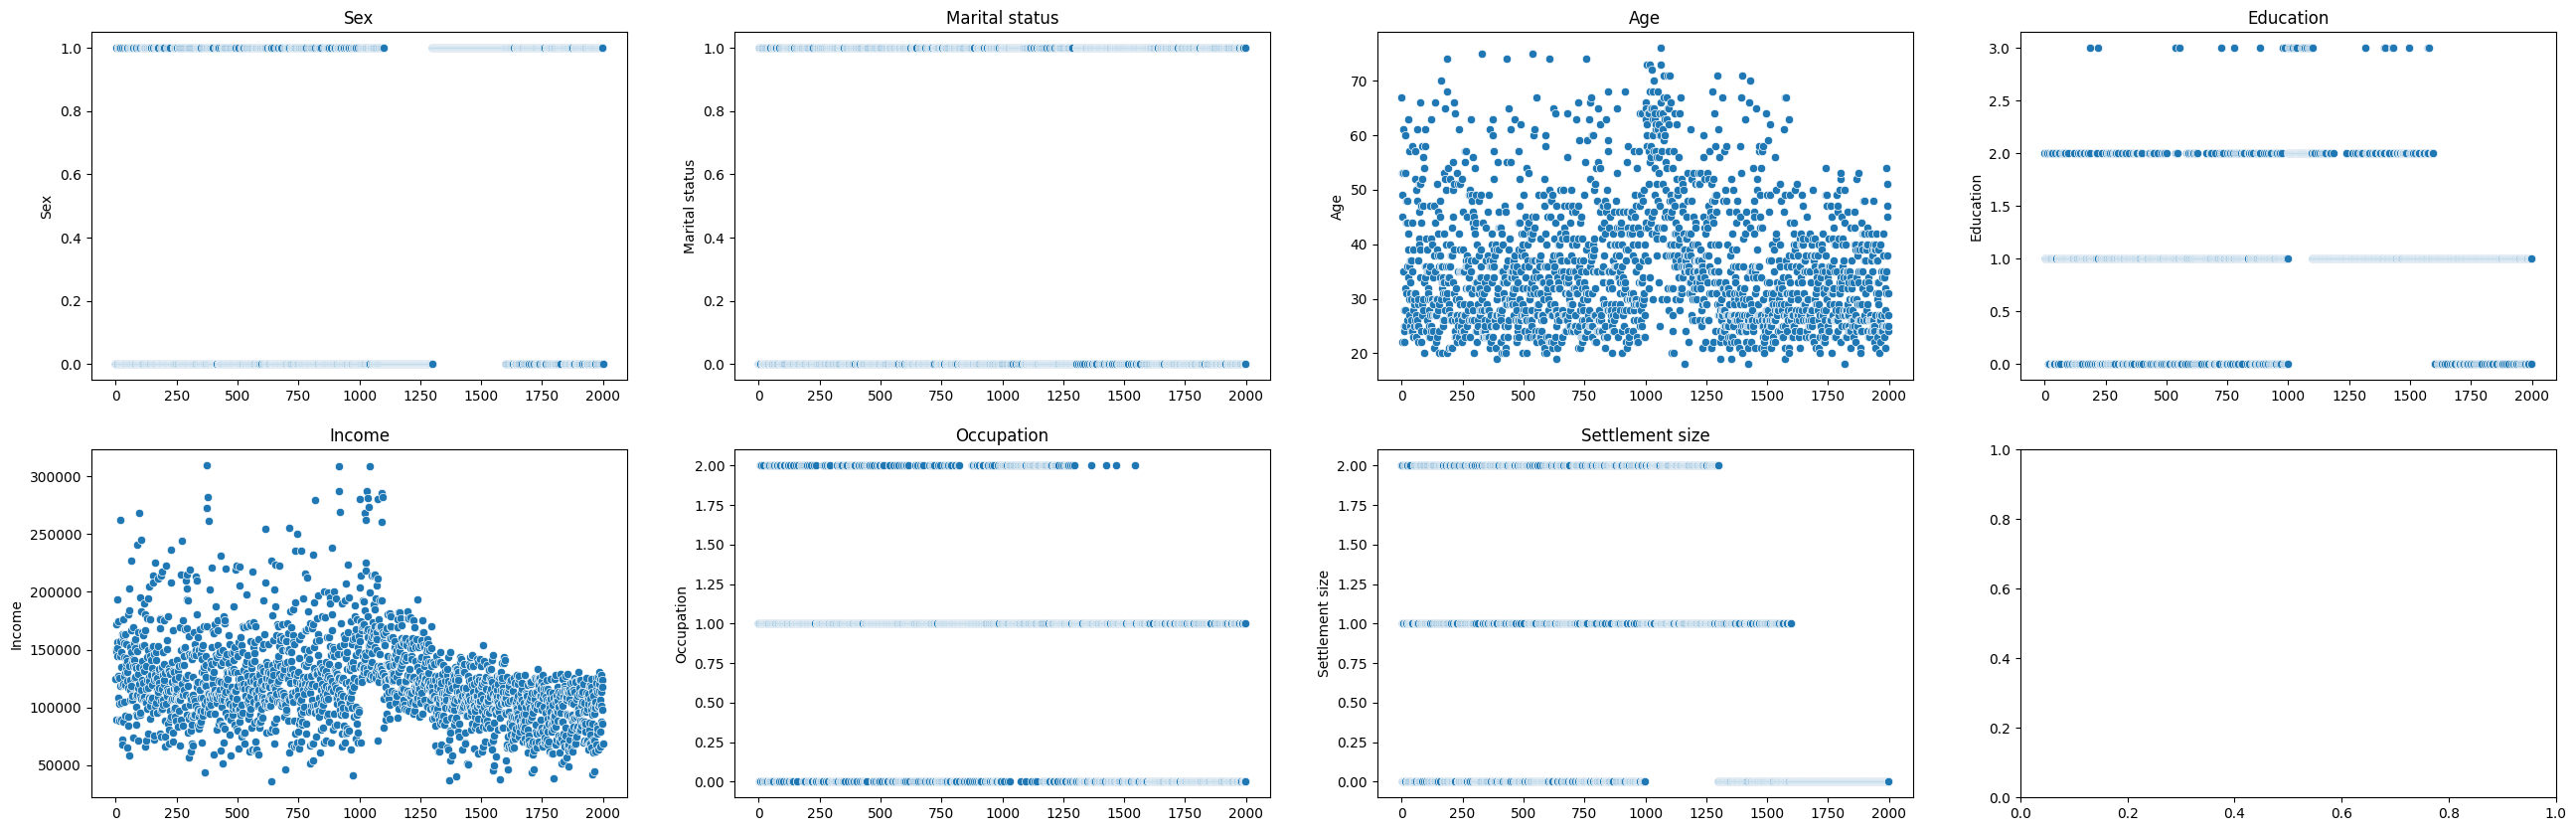

In [137]:
# plotting df
cols = df.columns

fig, axes = plt.subplots((len(cols)+1)//4, 4, figsize=(32, 10))

for i in range(len(cols)):
    ax = axes[i//4,i%4]
    sns.scatterplot(data=df, x=df.index, y=cols[i], ax=ax)
    ax.set_title(cols[i])
    
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

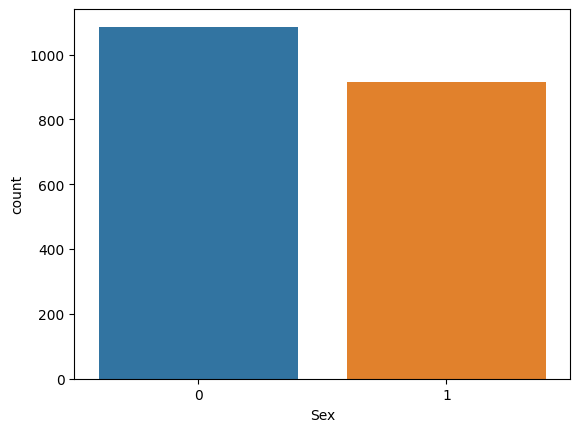

In [138]:
# Number of Male and Female customers in the data
sns.countplot(x='Sex', data=df)  #Number of Male customers is slightly more than Female customers

<Axes: xlabel='Settlement size', ylabel='count'>

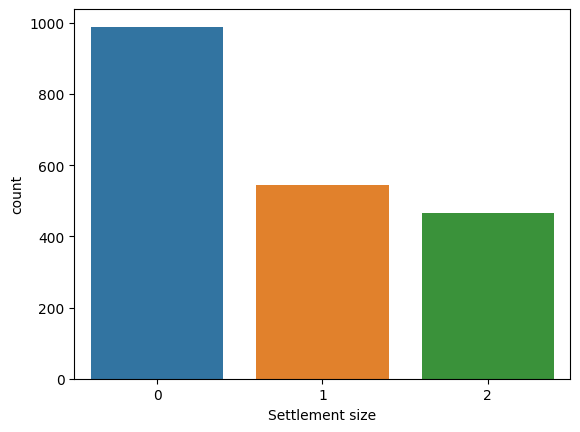

In [139]:
#Customers by Settlement Size
sns.countplot(x='Settlement size', data=df) #

<Axes: xlabel='Age', ylabel='Count'>

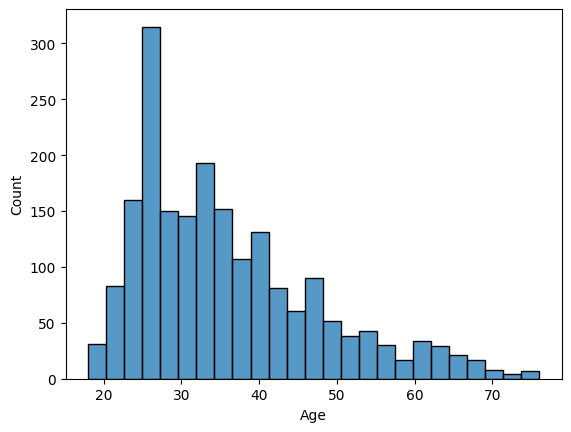

In [140]:
# Age Distribution of Customers
sns.histplot(x='Age', data=df)

<Axes: xlabel='Age'>

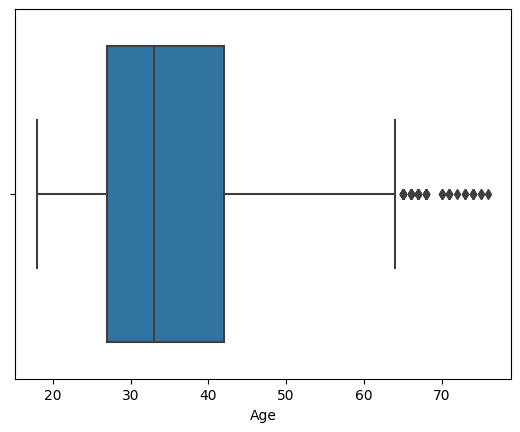

In [141]:
sns.boxplot(x='Age', data=df)

Median Age is around 33 years

Age distribution is right skewed

There are few outliers

<Axes: xlabel='Income', ylabel='Count'>

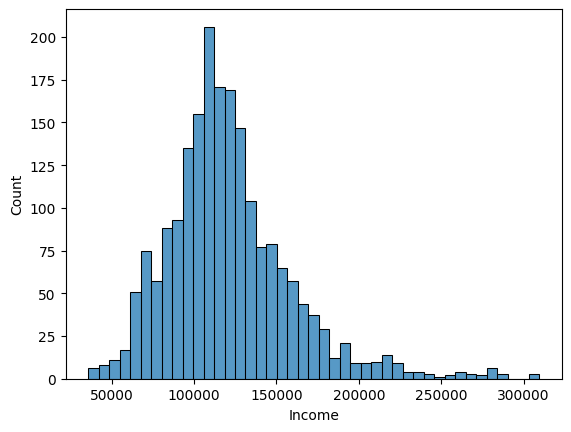

In [142]:
# Distribution of Income
sns.histplot(x='Income', data=df)

<Axes: xlabel='Income'>

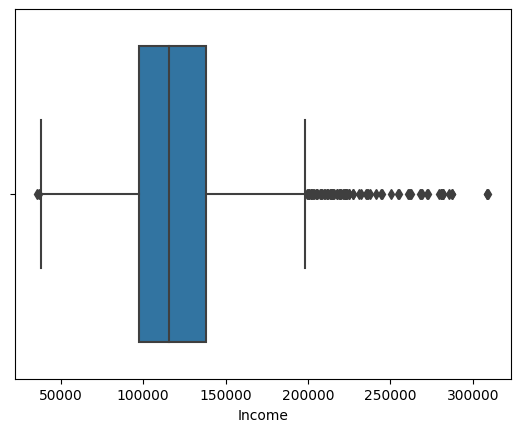

In [143]:
sns.boxplot(x='Income', data=df)

Distribution of Income is also right Skewed

There are few customers with higher income

<Axes: xlabel='Education', ylabel='count'>

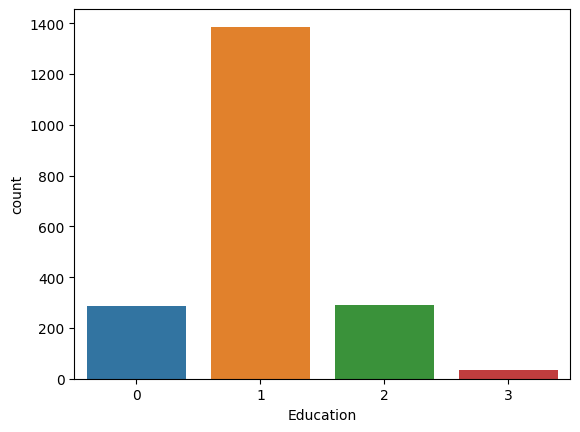

In [144]:
# Education level of customers
sns.countplot(x='Education', data=df)

Majority of customers have highschool education

Number of customers with graduate school education is least

Almost equal proportion of university educated and other educated customers

<Axes: xlabel='Occupation', ylabel='count'>

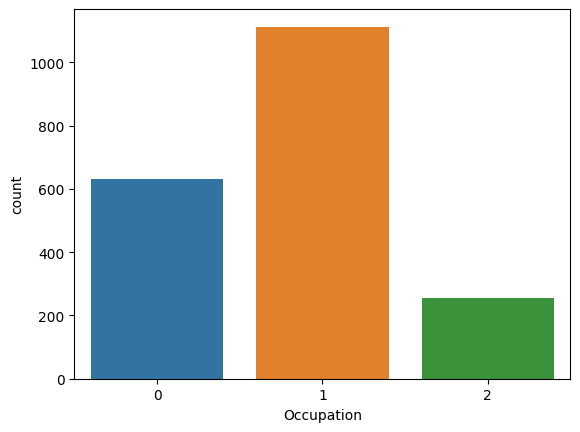

In [145]:
# Occupation of customers
sns.countplot(x='Occupation', data=df)  # Majority of customers are Skilled and Employed

# Data Normalization

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
X = StandardScaler()

In [148]:
scaled_df = X.fit_transform(df)

In [149]:
scaled_df

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# K-means clustering

In [150]:
#Import required module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Elbow Method**

Using the elbow method to find out the optimal number of clusters. 

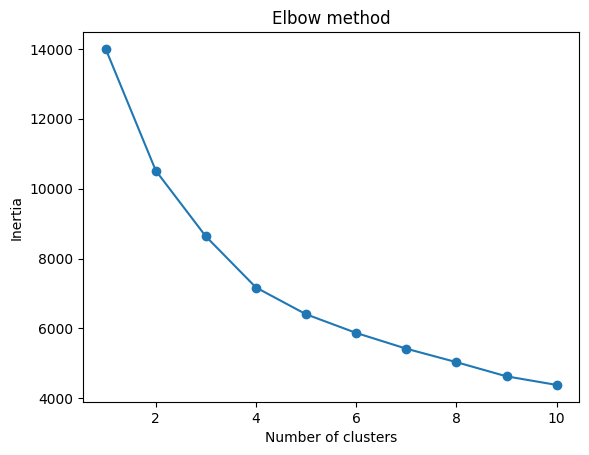

In [151]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [152]:
inertias   #Ideal value of K can be selected as 5 as the drop is not significant after this

[14000.0,
 10514.621716046855,
 8630.913216898227,
 7169.87082246584,
 6403.134167928612,
 5869.255171914047,
 5418.358680695146,
 5032.380553545652,
 4626.802634688549,
 4380.97103273502]

In [153]:
#Initialize the class object
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)

KMeans(n_clusters=5)

In [154]:
y_kmeans=kmeans.labels_
y_kmeans

array([2, 0, 3, ..., 3, 1, 3], dtype=int32)

**Silhouette method**

In [155]:
silhouette_score(scaled_df,y_kmeans)

0.25473881400398607

Since Silhouette scores are positive, that means the clustering is done correctly and data points are well separated.

In [156]:
#Now attach the segment to the original dataframe
df['cluster']=y_kmeans

If you are doing clustering in more than two dimensions you don’t execute the last code section below to visualize the clusters because it’s only for two-dimensional clustering. It is possible to use this code by using the dimension reduction technique. So if you reduce the dataset to two dimensions by these techniques then you can use this last code section to plot the clusters.

In [157]:
# #Visualising the clusters
# plt.scatter(scaled_df[y_kmeans==0, 0], scaled_df[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(scaled_df[y_kmeans==1, 0], scaled_df[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(scaled_df[y_kmeans==2, 0], scaled_df[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(scaled_df[y_kmeans==3, 0], scaled_df[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(scaled_df[y_kmeans==4, 0], scaled_df[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

In [158]:
# #Plot the centroid
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.title('Clusters of Customers')
# plt.xlabel('Annual Income(k$)')
# plt.ylabel('Spending Score(1-100')
# plt.show()